In [1]:
%display latex



# Define stuff

In [2]:
u = vector(list(var("u1 u2")) + [1])
u

(u1, u2, 1)

In [3]:
lambda_1, lambda_2, lambda_3 = var("lambda_1 lambda_2 lambda_3", domain="real")


def psi(r, n=2):
    assert 1 <= n <= 3
    ret = 1 + lambda_1 * r ^ 2
    if n >= 2:
        ret += lambda_2 * r ^ 4
    if n == 3:
        ret += lambda_3 * r ^ 6
    return ret


r = lambda u: norm(u[0:2])
g = lambda u, n=2: vector([u[0], u[1], psi(r(u), n)])

g(u)

(u1, u2, (abs(u1)^2 + abs(u2)^2)^2*lambda_2 + (abs(u1)^2 + abs(u2)^2)*lambda_1 + 1)

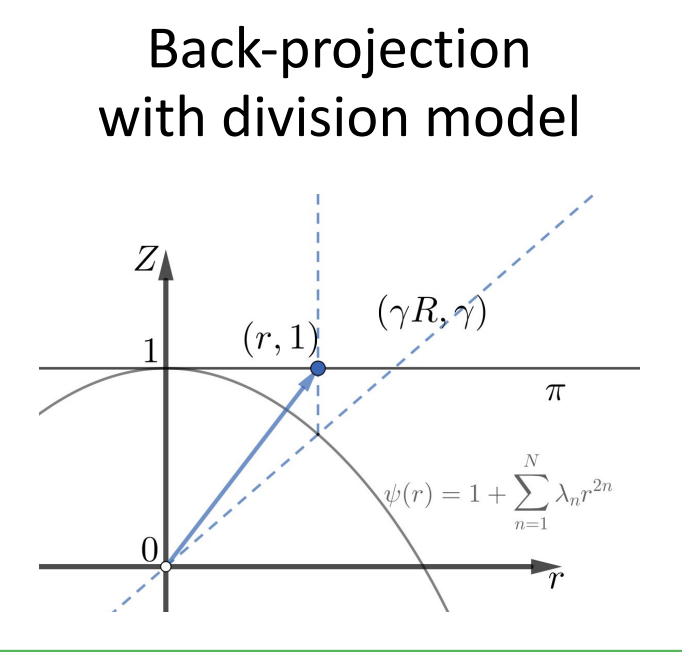

# Example

In [4]:
u_ = vector([0.3, 0.2, 1])
m = {lambda_1: -1, lambda_2: -1}

psi_ = psi(var("r_")).subs(m)
x_ = g(u_).subs(m)
lx_ = 2 * x_

f = lambda p: vector([r(p), p[2]])

In [5]:
r_ = var("r_", latex_name=r"\hat{r}")

In [6]:
s = solve(r(lx_) / lx_[2] == r_ / psi(r_).subs(m), r_)

In [7]:
eq = psi_ == 0

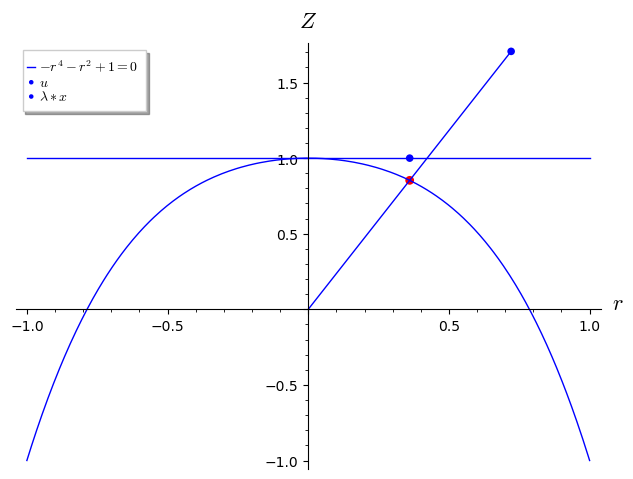

In [8]:
sum(
    [
        plot(eq, axes_labels=["$r$", "$Z$"], legend_label=f"${latex(eq)}$"),
        line([(-1, 1), (1, 1)]),
        point(f(u_), legend_label="$u$", size=30),
        # point(f(x_), legend_label=r"$x = \psi(u)$", size=30),
        line([(0, 0), 2 * f(x_)]),
        point(f(lx_), legend_label=r"$\lambda * x$", size=30),
    ]
    + [
        point((s_.rhs(), psi(s_.rhs()).subs(m)), color="red", size=40)
        for s_ in s
        if s_.rhs() in RR and s_.rhs() > 0
    ]
)

# Use it

In [9]:
x = vector(list(var("x1 x2 x3")))
x

(x1, x2, x3)

In [10]:
eq = (var('w') == r_ / psi(r_).subs({r(x) / x[2]: var("w")}))
eq

w == r_/(lambda_2*r_^4 + lambda_1*r_^2 + 1)

In [11]:
print(eq)

w == r_/(lambda_2*r_^4 + lambda_1*r_^2 + 1)


In [12]:
s = solve(eq, r_)

In [13]:
# for s_ in s:
#     display(s_.simplify_full())

# Inversion

In [14]:
for el in u[:2]:
    assume(el, 'real')

In [15]:
g(u) / psi(norm(u[:2]))

(u1/((u1^2 + u2^2)^2*lambda_2 + (u1^2 + u2^2)*lambda_1 + 1), u2/((u1^2 + u2^2)^2*lambda_2 + (u1^2 + u2^2)*lambda_1 + 1), 1)

In [16]:
print(g(u) / psi(norm(u[:2])))

(u1/((u1^2 + u2^2)^2*lambda_2 + (u1^2 + u2^2)*lambda_1 + 1), u2/((u1^2 + u2^2)^2*lambda_2 + (u1^2 + u2^2)*lambda_1 + 1), 1)


In [21]:
f = function('psi', latex_name=r'\psi')
a, b, _ = vector([u[0], u[1], f(norm(u[:2]))]) / f(norm(u[:2]))
a, b

(u1/psi(sqrt(u1^2 + u2^2)), u2/psi(sqrt(u1^2 + u2^2)))

In [22]:
[var('X') == a, var('Y') == b]

[X == u1/psi(sqrt(u1^2 + u2^2)), Y == u2/psi(sqrt(u1^2 + u2^2))]

In [23]:
solve([var('X') == a, var('Y') == b], u[0], u[1])

[X == u1/psi(sqrt(u1^2 + u2^2)), Y == u2/psi(sqrt(u1^2 + u2^2))]